In [28]:
%matplotlib inline

from utils import *
from plot_utils import *
from metrics import *

import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [29]:
# download datasets from public
data_download()

Download completed


In [30]:
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset()

In [31]:
[competition['name'] for competition in competition_id2competition.values()]

['Italian first division',
 'English first division',
 'Spanish first division',
 'French first division',
 'German first division',
 'European Championship',
 'World Cup']

In [5]:
# view a player data
a_player = list(player_id2player.keys())[0]
player_id2player[a_player]

{'passportArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'weight': 78,
 'firstName': 'Harun',
 'middleName': '',
 'lastName': 'Tekin',
 'currentTeamId': 4502,
 'birthDate': '1989-06-17',
 'height': 187,
 'role': {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'},
 'birthArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'wyId': 32777,
 'foot': 'right',
 'shortName': 'H. Tekin',
 'currentNationalTeamId': 4687}

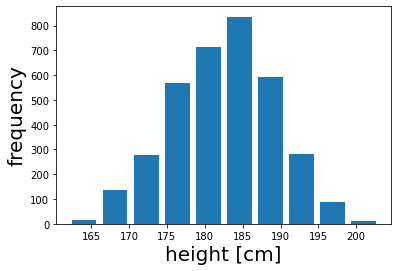

In [35]:
# plt player height and weight
heights = [player['height'] for player in player_id2player.values() if player['height'] > 0]
plt.hist(heights, rwidth=0.8)
plt.xlabel('height [cm]', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.savefig("../static/img/playerHeight.jpg",bbox_inches='tight',dpi=100)
plt.show()

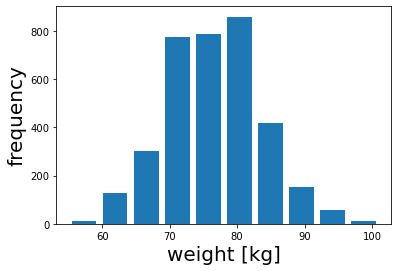

In [37]:
# plt player height and weight
heights = [player['weight'] for player in player_id2player.values() if player['weight'] > 0]
plt.hist(heights, rwidth=0.8)
plt.xlabel('weight [kg]', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.savefig("../static/img/playerWeight.jpg",bbox_inches='tight',dpi=100)

plt.show()

In [8]:
first_competition = list(competition_id2competition.keys())[0]
competition_id2competition[first_competition]

{'name': 'Italian first division',
 'wyId': 524,
 'format': 'Domestic league',
 'area': {'name': 'Italy',
  'id': '380',
  'alpha3code': 'ITA',
  'alpha2code': 'IT'},
 'type': 'club'}

### 4.C. <a id='matches'>Matches</a>

In [9]:
a_match = list(match_id2match.keys())[0]
match_id2match[a_match]#['teamsData'].keys()

{'status': 'Played',
 'roundId': 4406278,
 'gameweek': 38,
 'teamsData': {'3162': {'scoreET': 0,
   'coachId': 251025,
   'side': 'home',
   'teamId': 3162,
   'score': 2,
   'scoreP': 0,
   'hasFormation': 1,
   'formation': {'bench': [{'playerId': 4792,
      'ownGoals': '2',
      'redCards': '93',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 20972,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 256479,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 241675,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 260250,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 69417,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 20460,
      'ownGoals':

### Count goals in a season

In [10]:
match_id2match[a_match]['label']

'Lazio - Internazionale, 2 - 3'

In [11]:
sum_goals = 0
for match_id, match in match_id2match.items():
    goals = match['label'].split(', ')[1].split(' - ')
    goals = [int(goal) for goal in goals]
    sum_goals += sum(goals)
sum_goals

1017

### Count average goals per match

In [12]:
goals_in_match = []
for match_id, match in match_id2match.items():
    goals = match['label'].split(', ')[1].split(' - ')
    goals = [int(goal) for goal in goals]
    goals_in_match.append(sum(goals))
round(np.mean(goals_in_match), 2)

2.68

### 4.D. <a id='events'>Events</a>

In [13]:
match_id2events[a_match][0]

{'eventId': 8,
 'subEventName': 'Simple pass',
 'tags': [{'id': 1801}],
 'playerId': 3344,
 'positions': [{'y': 50, 'x': 49}, {'y': 58, 'x': 38}],
 'matchId': 2576335,
 'eventName': 'Pass',
 'teamId': 3161,
 'matchPeriod': '1H',
 'eventSec': 2.4175900000000183,
 'subEventId': 85,
 'id': 253668302}

### List distinct combination of event types and subtypes
refer to https://apidocs.wyscout.com/ for further information about event and subevents

In [25]:
event_types = []

for match_id, events in match_id2events.items():
    for event in events:
        event_types.append((event['eventName'], event['subEventName']))
#         if event['eventName'] == 'Shot':
#             print(event['tags'])

#             tags = event['tags']
#             for tag in tags:
#                 if tag['id'] == event_tag:
#                     events_time.append([event['matchId'], 
#                                         event['matchPeriod'], 
#                                         event['eventSec']])
                    
set(event_types)

[{'id': 402}, {'id': 201}, {'id': 1203}, {'id': 1801}]
[{'id': 401}, {'id': 201}, {'id': 1210}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 1901}, {'id': 402}, {'id': 201}, {'id': 1210}, {'id': 1802}]
[{'id': 1901}, {'id': 401}, {'id': 1216}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 401}, {'id': 201}, {'id': 1214}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 1802}]
[{'id': 402}, {'id': 1216}, {'id': 1802}]
[{'id': 403}, {'id': 2101}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 1802}]
[{'id': 402}, {'id': 1212}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 403}, {'id': 2101}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1215}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1206}, {'id': 1801}]
[{'id': 401}, {'id': 1210}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1205}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1220}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1213}, {'i

[{'id': 401}, {'id': 201}, {'id': 1205}, {'id': 1801}]
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1205}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1213}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1206}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1203}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 401}, {'id': 1215}, {'id': 1802}]
[{'id': 401}, {'id': 1215}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1210}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1216}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 402}, {'id': 1216}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1204}, {'id': 1801}]
[{'id': 403}, {'id': 201}, {'id': 1223}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id'

[{'id': 402}, {'id': 201}, {'id': 1202}, {'id': 1801}]
[{'id': 402}, {'id': 1201}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1207}, {'id': 1801}]
[{'id': 401}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 1901}, {'id': 401}, {'id': 1214}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 101}, {'id': 401}, {'id': 201}, {'id': 1209}, {'id': 1801}]
[{'id': 401}, {'id': 1215}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1202}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 402}, {'id': 1214}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 403}, {'id': 201}, {'id': 1214}, {'id': 1802}]
[{'id': 401}, {'id': 1215}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 1802}]
[{'

[{'id': 402}, {'id': 201}, {'id': 1216}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1216}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1206}, {'id': 1801}]
[{'id': 402}, {'id': 1216}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 1901}, {'id': 401}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 403}, {'id': 201}, {'id': 1211}, {'id': 1802}]
[{'id': 403}, {'id': 1216}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1215}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1206}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1203}, {'id': 1801}]
[{'id': 401}, {'id': 1213}, {'id': 1802}]
[{'id': 401}, {'id': 1215}, {'id': 1802}]
[{'id': 402}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1203}, {'id': 1801}]
[{'id': 402}, {'id': 2101}, {'id': 1802}]
[{'

[{'id': 403}, {'id': 201}, {'id': 1221}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1203}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1216}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1205}, {'id': 1801}]
[{'id': 401}, {'id': 201}, {'id': 1212}, {'id': 1802}]
[{'id': 402}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 403}, {'id': 201}, {'id': 1214}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1207}, {'id': 1801}]
[{'id': 1901}, {'id': 401}, {'id': 201}, {'id': 1210}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1204}, {'id': 1801}]
[{'id': 402}, {'id': 1216}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1217}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1207}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1207}, {'id': 1801}]
[{'id': 402}, {'id': 1216}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 1802}]
[{'id': 403}, {'id': 1210}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 

[{'id': 401}, {'id': 1214}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1210}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1213}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1212}, {'id': 1802}]
[{'id': 101}, {'id': 401}, {'id': 201}, {'id': 1202}, {'id': 1801}]
[{'id': 402}, {'id': 201}, {'id': 1207}, {'id': 1801}]
[{'id': 402}, {'id': 1210}, {'id': 1802}]
[{'id': 401}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 403}, {'id': 201}, {'id': 1216}, {'id': 1802}]
[{'id': 402}, {'id': 1215}, {'id': 1802}]
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 401}, {'id': 2101}, {'id': 201}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1215}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1212}, {'id': 1802}]
[{'id': 101}, {'id': 401}, {'id': 201}, {'id': 1201}, {'id': 1801}]
[{'id': 402}, {'id': 1212}, {'id': 1802}]
[{'id': 401}, {'id': 201}, {'id': 1222}, {'id': 1802}]


{('Duel', 'Air duel'),
 ('Duel', 'Ground attacking duel'),
 ('Duel', 'Ground defending duel'),
 ('Duel', 'Ground loose ball duel'),
 ('Foul', 'Foul'),
 ('Foul', 'Hand foul'),
 ('Foul', 'Late card foul'),
 ('Foul', 'Out of game foul'),
 ('Foul', 'Protest'),
 ('Foul', 'Simulation'),
 ('Foul', 'Time lost foul'),
 ('Foul', 'Violent Foul'),
 ('Free Kick', 'Corner'),
 ('Free Kick', 'Free Kick'),
 ('Free Kick', 'Free kick cross'),
 ('Free Kick', 'Free kick shot'),
 ('Free Kick', 'Goal kick'),
 ('Free Kick', 'Penalty'),
 ('Free Kick', 'Throw in'),
 ('Goalkeeper leaving line', 'Goalkeeper leaving line'),
 ('Interruption', 'Ball out of the field'),
 ('Interruption', 'Whistle'),
 ('Offside', ''),
 ('Others on the ball', 'Acceleration'),
 ('Others on the ball', 'Clearance'),
 ('Others on the ball', 'Touch'),
 ('Pass', 'Cross'),
 ('Pass', 'Hand pass'),
 ('Pass', 'Head pass'),
 ('Pass', 'High pass'),
 ('Pass', 'Launch'),
 ('Pass', 'Simple pass'),
 ('Pass', 'Smart pass'),
 ('Save attempt', 'Reflexes'

## 5. <a id='basic_statistics'>Basic statistics</a>

### 5.A. <a id="frequency_by_type">Frequency of events per type</a>

For each event type, we plot how frequent it is in the events data set.

In [38]:
events_list = []
for match_id, events in match_id2events.items():
    for event in events:
        events_list.append(event['eventName'])

count = Counter(events_list)
count

Counter({'Pass': 337317,
         'Others on the ball': 52170,
         'Duel': 167781,
         'Foul': 9994,
         'Free Kick': 37987,
         'Interruption': 27024,
         'Shot': 8806,
         'Save attempt': 3561,
         'Offside': 1620,
         'Goalkeeper leaving line': 1112})

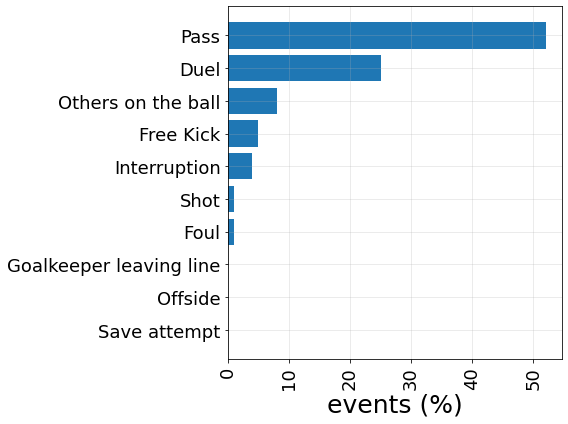

In [42]:

# express frequency in percentage
counter = {}
for i, n_events in zip(count.keys(), count.values()):
    counter[i] = int(float(n_events)/len(events_list)*100)
sorted_d = np.array(sorted(counter.items(), key=operator.itemgetter(1), reverse=False))

#bar plot
fig, ax = plt.subplots(figsize=(8,6))
plt.barh(list(sorted_d[:,0]),[int(x) for x in list(sorted_d[:,1])])
plt.xticks(rotation=90);plt.xticks(fontsize=18)
plt.xlabel('events (%)', fontsize=25)
plt.yticks(fontsize=18)
plt.grid(alpha=0.3)
fig.tight_layout()
plt.savefig("../static/img/frequencyOfEvents.jpg",bbox_inches='tight',dpi=60)
plt.show()

### 5.B. <a id='events_per_match'>Distribution of the number of events per match</a>
We compute the number of events in each match. We then plot the distribution of this quantity.

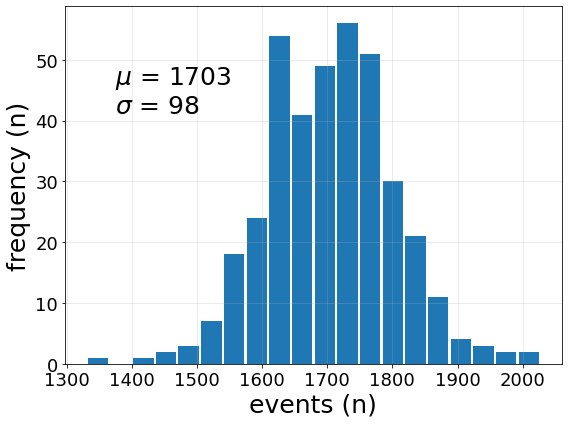

In [41]:
values = [len(events) for events in match_id2events.values()]
avg_n_events = np.mean(values)
std_n_events = np.std(values)

fig, ax = plt.subplots(figsize=(8,6))
plt.hist(values, rwidth=0.9, bins=20)
plt.grid(alpha=0.3)
plt.yticks(fontsize=18)
plt.xlabel('events (n)', fontsize=25)
plt.ylabel('frequency (n)', fontsize=25)
plt.xticks(fontsize=18)
plt.text(0.1, 0.7, 
         '$\mu$ = %i\n$\sigma$ = %i'%(avg_n_events, std_n_events), 
         fontsize=25, transform=ax.transAxes)
fig.tight_layout()
plt.savefig("../static/img/distributionOfEvents.jpg",bbox_inches='tight',dpi=60)
plt.show()

## 7. <a id='spatial_distribution_events'>Spatial distribution of events</a>

Distribution of positions per event type. Kernel density plots showing the distribution of the events’ positions during match. The darker is the green, the higher is the number of events in a specific field zone.

In [46]:
def plot_kde_events_on_field(sample_size=10000):
    positions = []
    for match_events in match_id2events.values():
        for event in match_events:
            positions.append([event['eventName'], 
                              event['positions'][0]['x'], 
                              event['positions'][0]['y']])

    positions_df = pd.DataFrame(positions, columns=['eventName','x','y'])

    for event_type in EVENT_TYPES:
        pos_event_df = positions_df[positions_df['eventName'] == event_type]
        fig, ax = pitch()
        if len(pos_event_df) >= sample_size:
            x_y = pos_event_df[['x','y']].sample(sample_size).astype(float)
        else:
            x_y = pos_event_df[['x','y']].astype(float)
        
        sns.kdeplot(x_y['x'], x_y['y'], cmap = 'Greens', shade = True)
        
        plt.title(event_type, fontsize = 30)
        plt.xlim(-1,101)
        plt.ylim(-1,101)
        plt.axis('off')
        fig.tight_layout()
        fileName = "spatialDistributionOf" + event_type + ".jpg"
        plt.savefig("../static/img/" + fileName,bbox_inches='tight',dpi=60)
#         plt.savefig(fileName)
        plt.show()

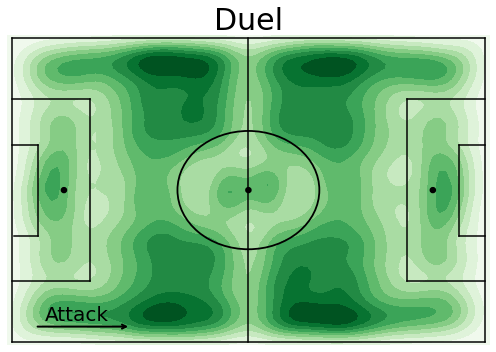

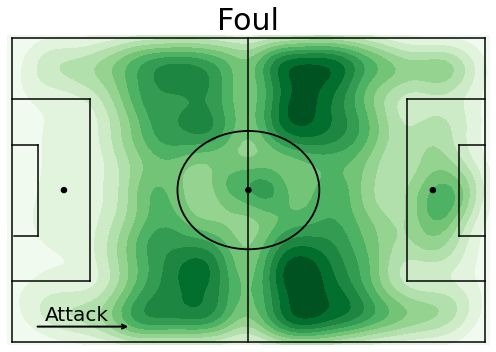

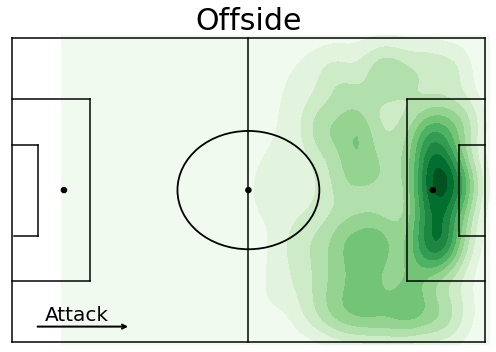

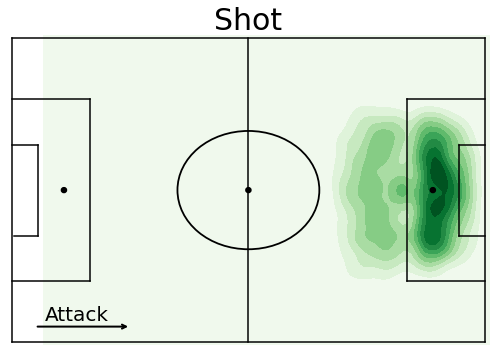

In [47]:
plot_kde_events_on_field(sample_size=100000)

In [48]:
def in_match_evolution(event_name='Goal', event_tag=101):
    # slect specific event in accordance with event_tag
    events_time = []
    for match_id, match_events in match_id2events.items():
        for event in match_events:
            tags = event['tags']
            for tag in tags:
                if tag['id'] == event_tag:
                    events_time.append([event['matchId'], 
                                        event['matchPeriod'], 
                                        event['eventSec']])
                
    # let us convert it into a DataFrame
    event_df = pd.DataFrame(events_time, columns=['matchId','matchPeriod','eventSec'])
    
    
    # create figure
    fig, ax = plt.subplots(figsize=(8,6))
    start_bin_2h = 11
    
    # define plot characteristics for 1H e 2H
    for half, color_bar in zip(['1H','2H'],['blue','green']):
        
        # define DataFrame per half time
        df_half = event_df[event_df['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        
        # create bins every 5 minutes
        df_half['binned'] = df_half['eventSec'].pipe(lambda x: pd.to_timedelta(x, "s")).dt.floor("5min").astype("category").cat.codes
        
        # merge bins up to 45 minutes 
        df_half['binned'] = [9 if x>9 else x for x in df_half['binned']]
        
        # plot bin for second half
        if half == '2H':
            df_half['binned'] = [x+start_bin_2h for x in df_half['binned']]
            
        # barplot
        count = Counter(df_half.binned)
        barlist = plt.bar(count.keys(),count.values(),
                          label=half,color=color_bar)
        
    plt.legend(loc=2, fontsize=15, frameon=True, shadow=True)
    plt.xticks(list(range(0,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    max_count_value = np.max(list(count.values()))
    plt.text(9.65, max_count_value-(max_count_value/100*10), 'half time', rotation=90, 
             bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center', horizontalalignment='left', fontsize=15, 
             color='tomato')
    plt.vlines(10, 0, max_count_value+(max_count_value/100*10),colors='r',alpha=0.5)
    plt.ylim(0,max_count_value+(max_count_value/100*10))
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('%s (n)'%event_name, fontsize=25)
    plt.grid(alpha=0.3)
    fig.tight_layout()
    fileName = "evolutionOf" + event_name + ".jpg"
    plt.savefig("../static/img/" + fileName,bbox_inches='tight',dpi=60)
#     plt.savefig(fileName)
    plt.show()

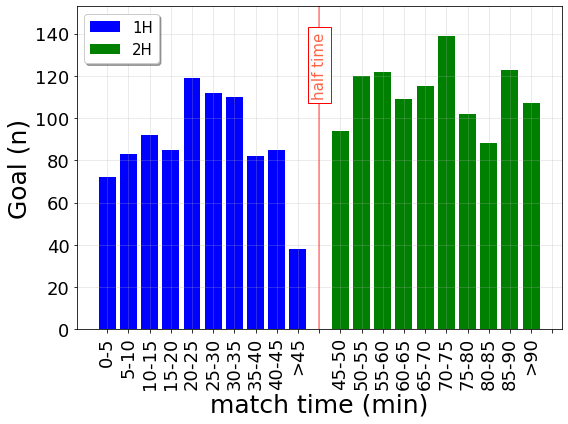

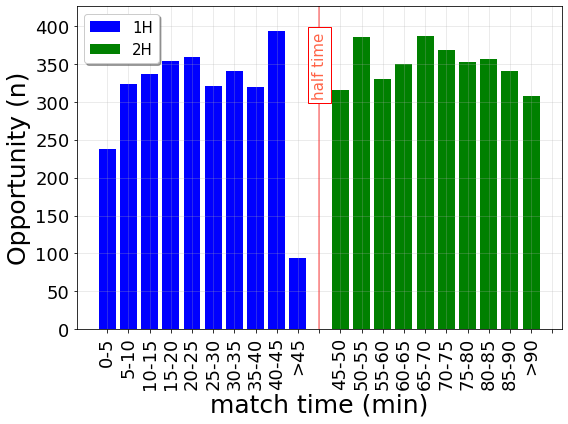

In [49]:
in_match_evolution(event_name='Goal', event_tag=101)
in_match_evolution(event_name='Opportunity', event_tag=201)

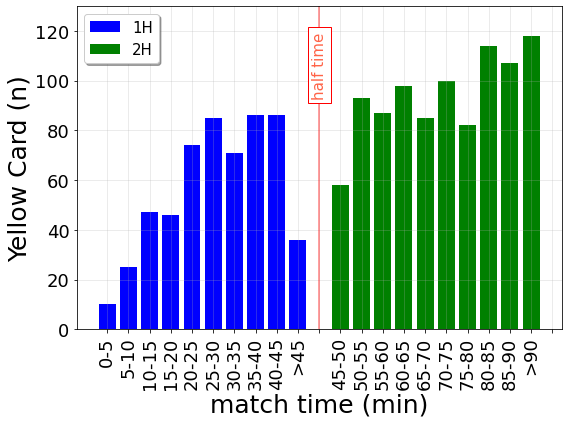

In [50]:
in_match_evolution(event_name='Yellow Card', event_tag=1702)

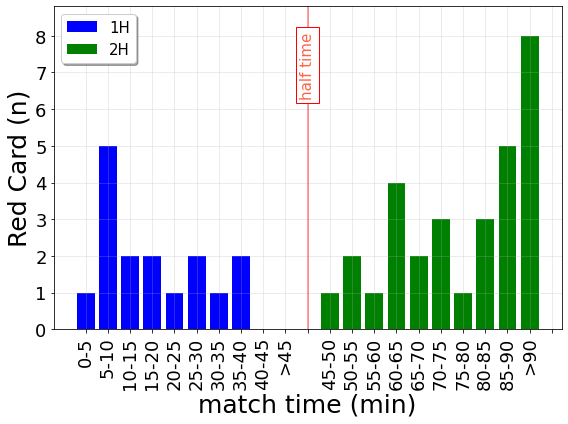

In [51]:
in_match_evolution(event_name='Red Card', event_tag=1701)

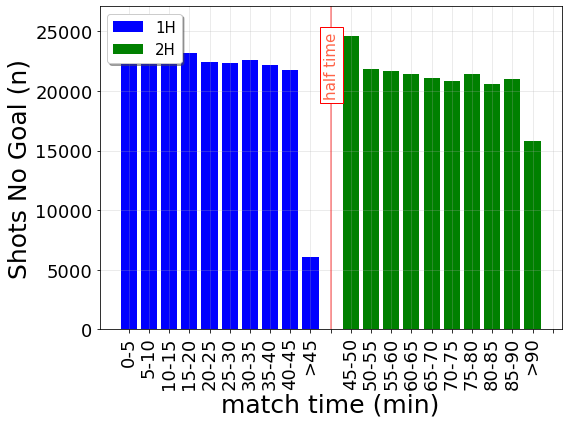

In [27]:
in_match_evolution(event_name='Shots No Goal', event_tag=1801)

In [ ]:
len(match_id2events)